In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_AEC_1d_2c_1s_4r_4w.json
2.	dc_EEG_8d_3c_3s_5r_3w_RR.json
3.	dc_EEG_8d_8c_3s_5r_8w_RR.json
4.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
5.	dc_dist_14d.json
6.	dc_dist_2d_3c_2s_3r_6w.json
7.	dc_fed_dist_14d.json
8.	dc_fed_dist_2d_3c_2s_3r_6w.json
9.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
10.	dc_synt_8d_8w_2c_4s_4r.json
11.	dc_synt_8d_8w_4c_6r_4s.json
12.	dc_synt_distributed_w5_c3_6r_3s_3d.json
13.	dc_test_synt_1d_2c_1s_4r_4w.json
14.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2

In [4]:
dc = 3
conn = 21
exp = 2
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_confusion_Matrix_test"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-08-06 10:29:56,687] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 5 [batches/sec]
                 Batchsize: 10 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.10', '10.0.0.8', '10.0.0.12', '10.0.0.32', '10.0.0.33', '10.0.0.34', '10.0.0.35']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
                 Workers: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
                 Sources: ['s1', 's2', 's3']
                 Routers: ['r1', 'r2', 'r3', 'r4', 'r5']
[INFO][2024-08-06 10:29:56,688] Connections:
[INFO][2024-08-06 10:29:56,689] 		 r1 : ['mainServer', 'c1', 'c2', 'r2']
[INFO][2024-08-06 10:29:56,689] 		 r2 : ['c3', 'c4', 's1', 'r3']
[INFO][2024-08-06 10:29:56,690] 		 r3 : ['c5', 'c6', 'r4', 'r1']
[INFO][2024-08-

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-08-06 10:29:58,740] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [8]:
API.send_jsons_to_devices()

[INFO][2024-08-06 10:30:50,189] Sending distributed configurations to devices is completed


In [9]:
API.run_current_experiment_phase()

[INFO][2024-08-06 10:31:35,846] Experiment phase: training_phase of type training starts running...
[INFO][2024-08-06 10:31:35,847] Sending data to sources
[INFO][2024-08-06 10:31:36,416] Data is ready in sources
[INFO][2024-08-06 10:31:36,418] Phase training requested from Main Server
[INFO][2024-08-06 10:31:50,980] Processing experiment phase data
[INFO][2024-08-06 10:31:50,982] Processing experiment phase data completed
[INFO][2024-08-06 10:31:50,983] Start generating communication statistics for training_phase of type training
[INFO][2024-08-06 10:31:50,984] Statistics requested from Main Server
[INFO][2024-08-06 10:31:51,439] Statistics received from Main Server
[INFO][2024-08-06 10:31:51,440] Phase of training_phase training completed


In [10]:
stats = API.get_experiment_flow(exp_name).generate_stats()

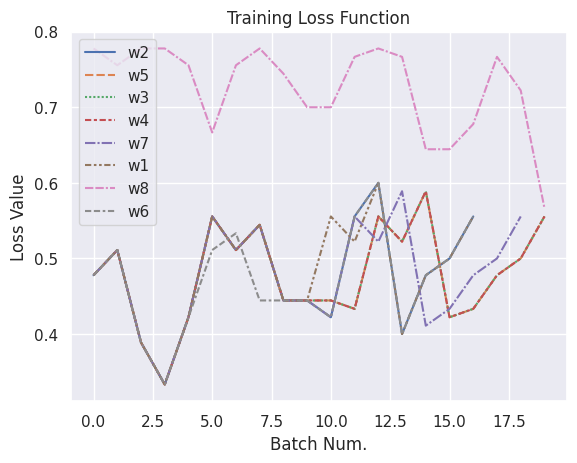

In [11]:
loss_ts = stats.get_loss_ts(plot=True)

In [12]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-06 10:32:00,371] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-08-06 10:32:00,372] Sending data to sources
[INFO][2024-08-06 10:32:01,103] Data is ready in sources
[INFO][2024-08-06 10:32:01,104] Phase prediction requested from Main Server
[INFO][2024-08-06 10:32:11,492] Processing experiment phase data
[INFO][2024-08-06 10:32:11,498] Processing experiment phase data completed
[INFO][2024-08-06 10:32:11,499] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-08-06 10:32:11,501] Statistics requested from Main Server
[INFO][2024-08-06 10:32:11,956] Statistics received from Main Server
[INFO][2024-08-06 10:32:11,958] Phase of prediction_phase prediction completed


In [13]:
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

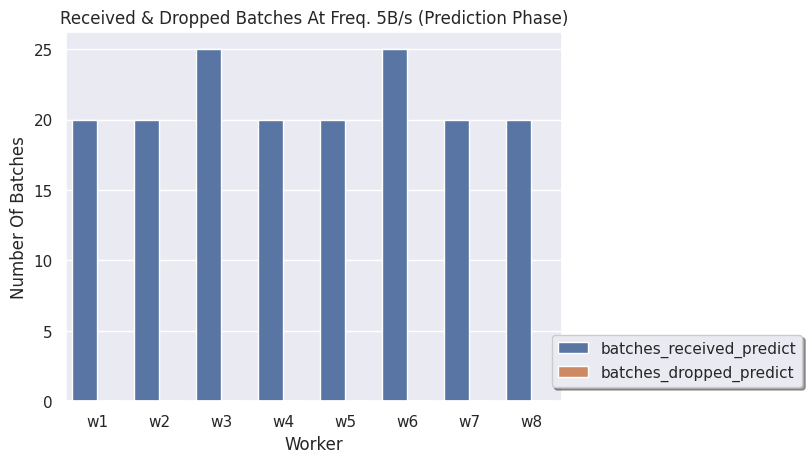

In [14]:
import pandas as pd
workers_comm_dict = stats_pred.get_communication_stats_workers()
df_pred = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_pred = df_pred.iloc[[4,6]]
data_pred = pd.melt(df_selected_pred.reset_index(), id_vars=['index'], value_vars=df_pred.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_pred)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 5B/s (Prediction Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

In [15]:
print(stats_pred.get_recieved_batches())

{'phase:prediction_phase,s1->w1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'phase:prediction_phase,s1->w4': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'phase:prediction_phase,s1->w7': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'phase:prediction_phase,s2->w2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'phase:prediction_phase,s2->w8': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'phase:prediction_phase,s2->w5': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'phase:prediction_phase,s3->w3': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'phase:prediction_phase,s3->w6': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}


In [16]:
print(stats_pred.get_missed_batches())

{}


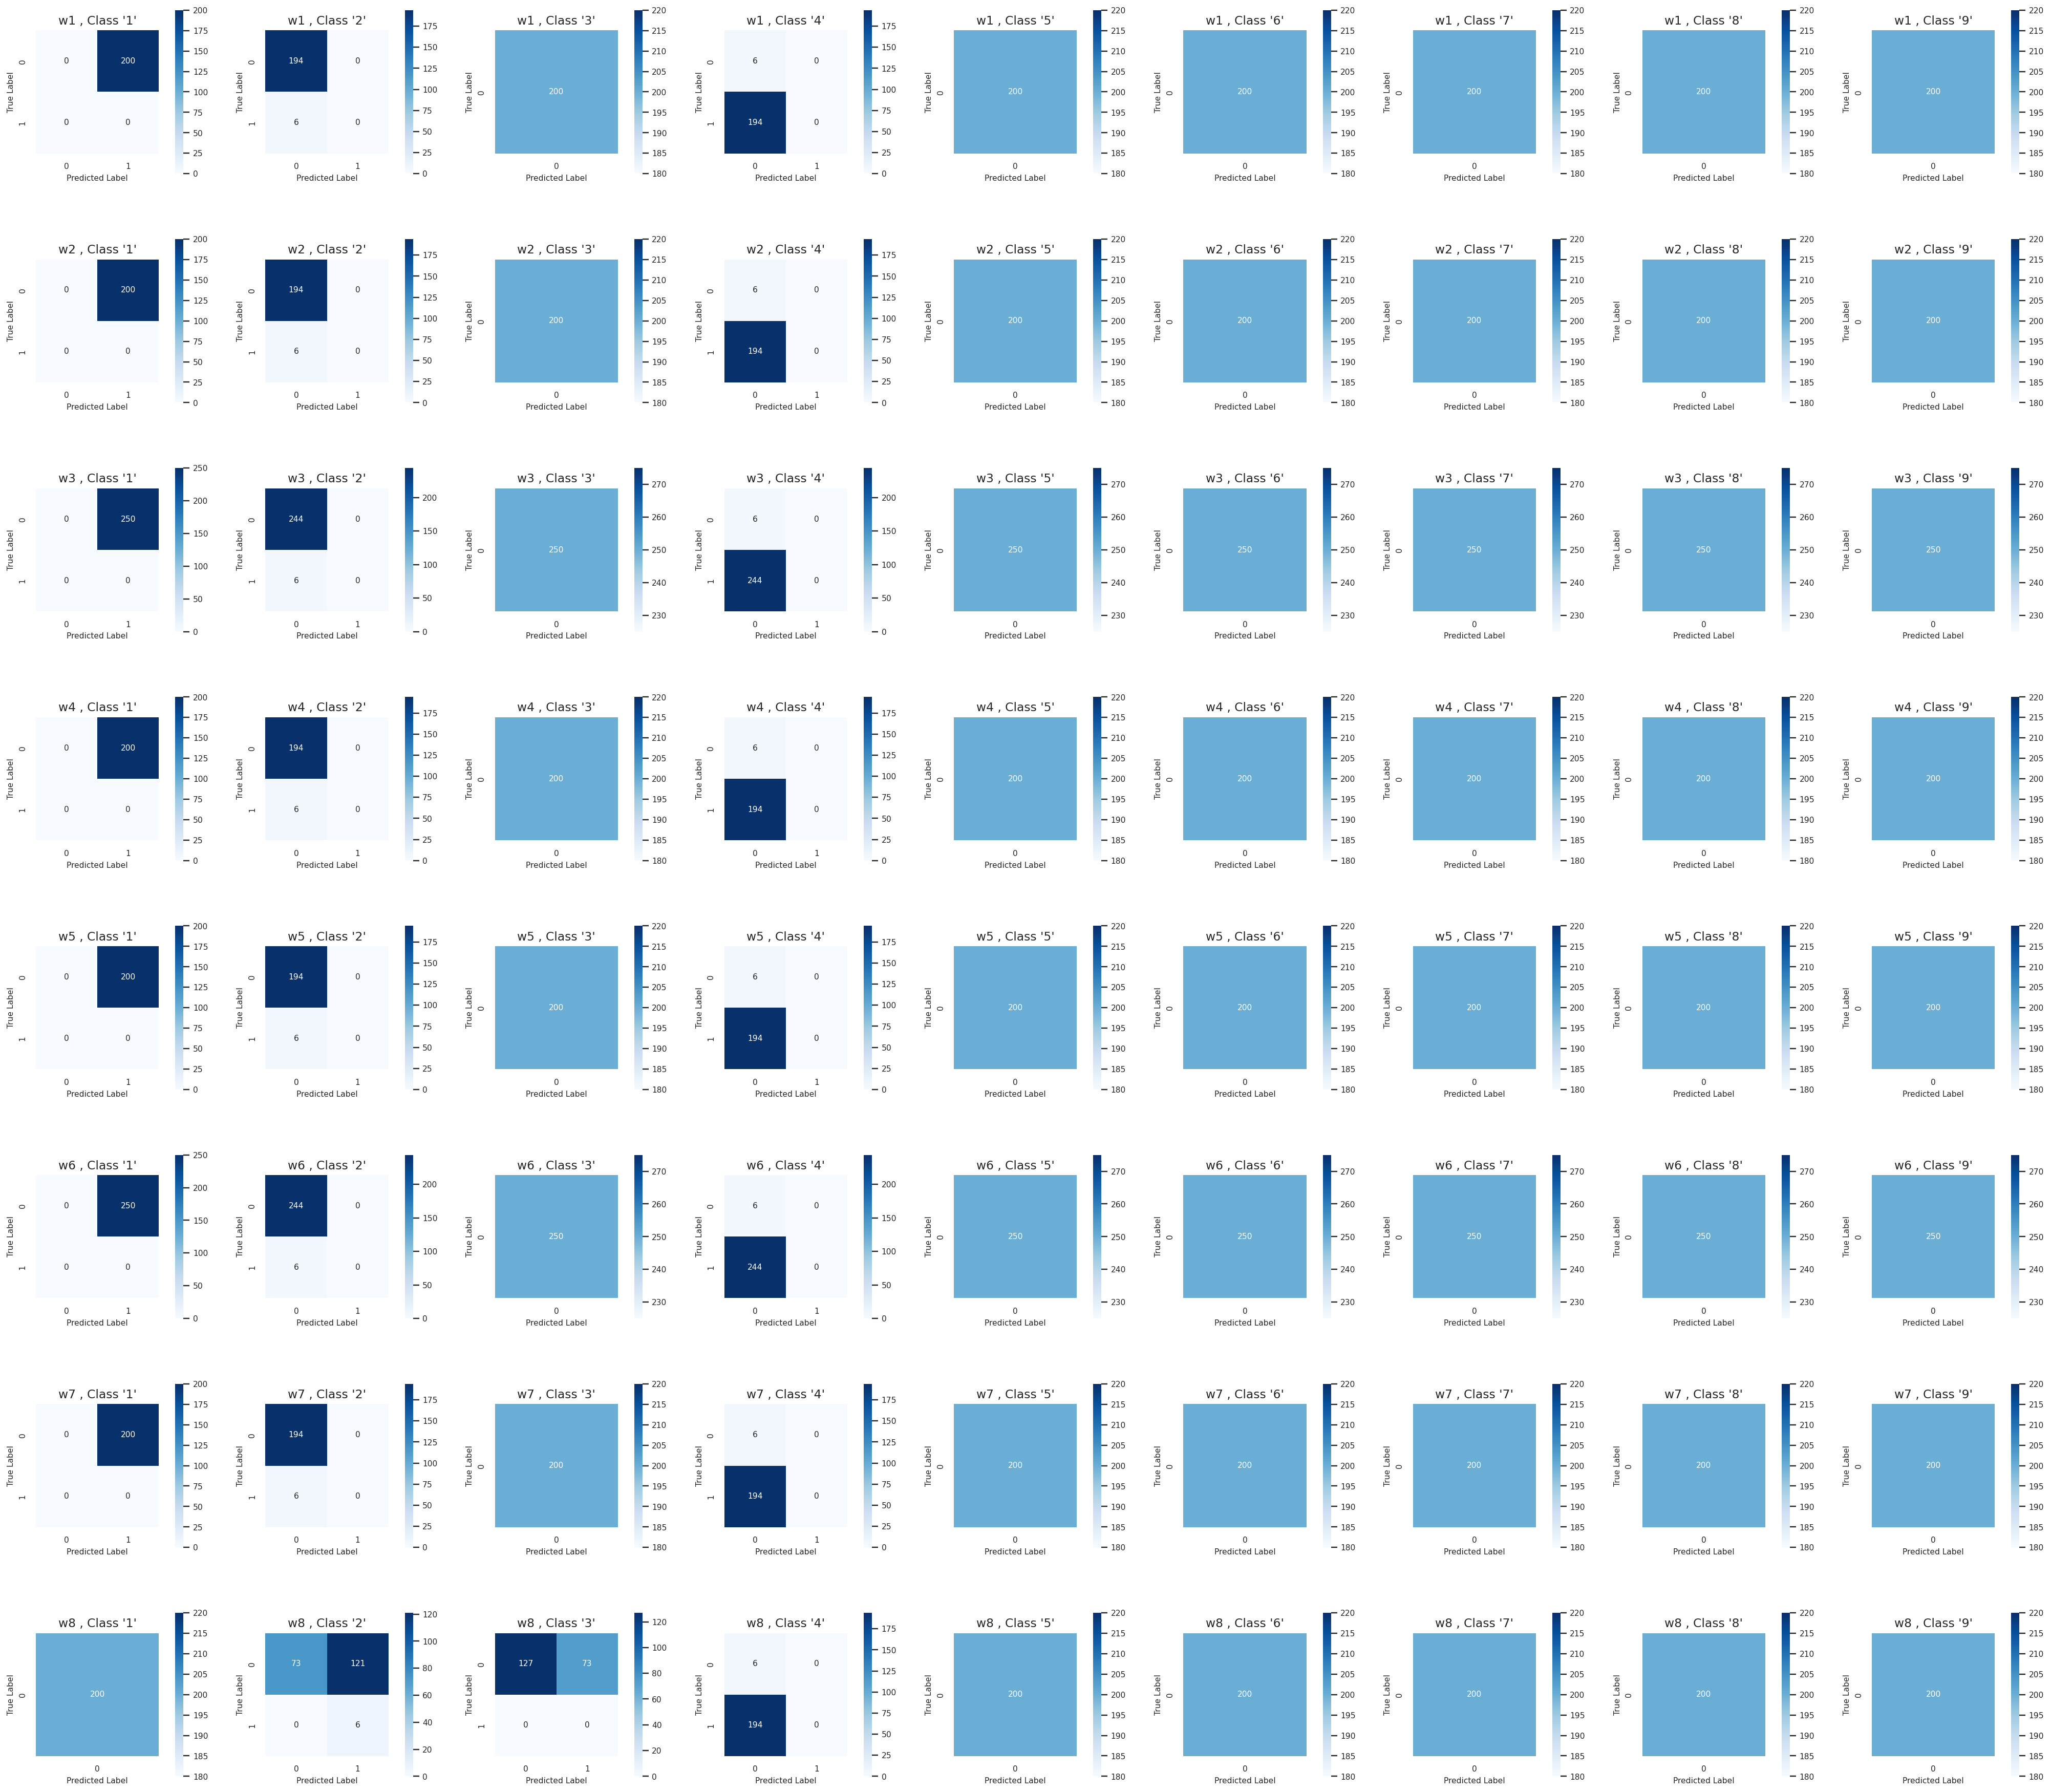

In [17]:
_ , conf_mats_workers = stats_pred.get_confusion_matrices(plot = True)